# 2023 데이터분석 경진대회

### 팀명
- 잠시, 정차

<br/>

### 팀원
- 광주은행 IT개발부 행원 최정현
- 광주은행 IT기획부 행원 차범희

<br/>

### 기획 내용

```
신규고객을 유치하는 것은 많은 마케팅과 영업활동이 수반되므로 기존고객을 유지하는 것보다 더 높은 비용이 소모됩니다. 때문에 고객 이탈 방지는 단순히 표면적으로 보이는 수치적인 면뿐만 아니라 비용 절감 측면에서도 중요한 사항입니다.
때문에, 고객 이탈예측모델을 고안하여 어떤 고객이 이탈할 가능성이 높은지 확인하고, 거래량, 나이 등 고객의 특징점 중에서 가장 영향력 높은 항목을 분석하여 추후 마케팅이나 신규 상품 설계에 있어서 도움이 되고자 하였습니다.
```

# 패키지 설치 및 로드

### 패키지 설치

In [4]:
# 필요한 패키지들을 설치합니다.

'''
!pip install seaborn --quiet
!pip install numpy --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install xgboost --quiet
!pip install imblearn --quiet
!pip install plotly jupyterlab --quiet
!pip install lightgbm --quiet
'''

'\n!pip install seaborn --quiet\n!pip install numpy --quiet\n!pip install pandas --quiet\n!pip install scikit-learn --quiet\n!pip install xgboost --quiet\n!pip install imblearn --quiet\n!pip install plotly jupyterlab --quiet\n!pip install lightgbm --quiet\n'

### 패키지 로드(import)

In [5]:
# 데이터 처리를 위한 Numpy 및 Pandas 패키지 임포트
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 Matplotlib, Seaborn 패키지 임포트
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 결측치 처리를위한 패키지 임포트
from sklearn.impute import KNNImputer

# 인코딩을 위한 패키지 임포트
from sklearn.preprocessing import LabelEncoder

# 테스트 데이터 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 데이터 모델링을 위한 랜덤포레스트/ XGBoost / LightGBM 패키지 임포트
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 그리드서치 패키지 임포트
from sklearn.model_selection import GridSearchCV

# Overfitting 방지를 위한 교차검증 패키지 임포트
from sklearn.model_selection import cross_val_score, learning_curve

# 성능 지표 계산을 위한 패키지 임포트
from sklearn.metrics import roc_curve, roc_auc_score

# 출력 간소화를 위한 셋팅
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# EDA & Visualization

### 데이터 로드

In [6]:
# csv 파일(데이터) 로드
df = pd.read_csv('../0.data/bank_churner.csv')

# 데이터 확인
df.tail(5)

,Unnamed: 0,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
8096,8096,828285858,0,41,F,3,College,Married,NaN,Blue,...,1,2,1438.3,765.0,673.3,NaN,NaN,NaN,NaN,0.532
8097,8097,828288333,0,50,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659.0,2981.0,NaN,NaN,NaN,0.842,0.181
8098,8098,828294933,1,49,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437.0,514.0,NaN,NaN,NaN,0.565,NaN
8099,8099,828298908,0,54,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035.0,837.0,0.613,1770.0,NaN,0.741,0.709
8100,8100,828343083,0,43,F,4,High School,Unknown,Less than $40K,Blue,...,3,3,2786.0,1793.0,993.0,0.803,NaN,68.0,0.659,NaN


### 데이터 정보 확인

In [7]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8101 non-null   int64  
 1   cstno                  8101 non-null   int64  
 2   is_churned             8101 non-null   int64  
 3   age                    8101 non-null   int64  
 4   sex                    7293 non-null   object 
 5   dependent_num          8101 non-null   int64  
 6   education              8101 non-null   object 
 7   marital_stat           8101 non-null   object 
 8   imcome_cat             6482 non-null   object 
 9   card_type              8101 non-null   object 
 10  mon_on_book            8101 non-null   int64  
 11  tot_product_count      8101 non-null   int64  
 12  months_inact_for_12m   8101 non-null   int64  
 13  contact_cnt_for_12m    8101 non-null   int64  
 14  credit_line            8101 non-null   float64
 15  tot_

In [8]:
# (고객번호는 제외 (무의미한 컬럼))
df.drop(list(df.iloc[:, [0]]), axis=1, inplace=True)

# 데이터 정보 확인
df.describe().T.style.format('{0:.2f}').bar(
    subset=['mean'], align='zero', color='#205ff2').background_gradient(
        subset=['std'], cmap='Reds').background_gradient(
            subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
cstno,8101.00,739132946.43,36919115.76,708082083.00,713053383.00,717886008.00,772846383.00,828343083.00
is_churned,8101.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
age,8101.00,46.31,8.02,26.00,41.00,46.00,52.00,70.00
dependent_num,8101.00,2.33,1.29,0.00,1.00,2.00,3.00,5.00
mon_on_book,8101.00,35.92,8.02,13.00,31.00,36.00,40.00,56.00
tot_product_count,8101.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
months_inact_for_12m,8101.00,2.35,1.01,0.00,2.00,2.00,3.00,6.00
contact_cnt_for_12m,8101.00,2.45,1.10,0.00,2.00,2.00,3.00,6.00
credit_line,8101.00,8636.55,9086.42,1438.30,2555.00,4549.00,11128.00,34516.00
tot_revol_balance,6580.00,1158.69,814.65,0.00,324.75,1272.00,1777.25,2517.00


### 카테고리형 컬럼 시각화
    1. sex
    2. education
    3. material_stat
    4. card_type

In [9]:
# 카테고리형 컬럼 찾기
col_cat = df.select_dtypes(include=["object"]).columns.tolist()

# 데이터 값 종류 확인
for col in col_cat:
    print('Column명 : ', col.title(),"\n =>", df[col].unique())
    print()

Column명 :  Sex 
 => ['F' 'M' nan]

Column명 :  Education 
 => ['High School' 'Unknown' 'Doctorate' 'Uneducated' 'Graduate' 'College'
 'Post-Graduate']

Column명 :  Marital_Stat 
 => ['Married' 'Single' 'Divorced' 'Unknown']

Column명 :  Imcome_Cat 
 => ['Less than $40K' '$40K - $60K' '$80K - $120K' 'Unknown' '$60K - $80K' nan
 '$120K +']

Column명 :  Card_Type 
 => ['Blue' 'Silver' 'Gold' 'Platinum']



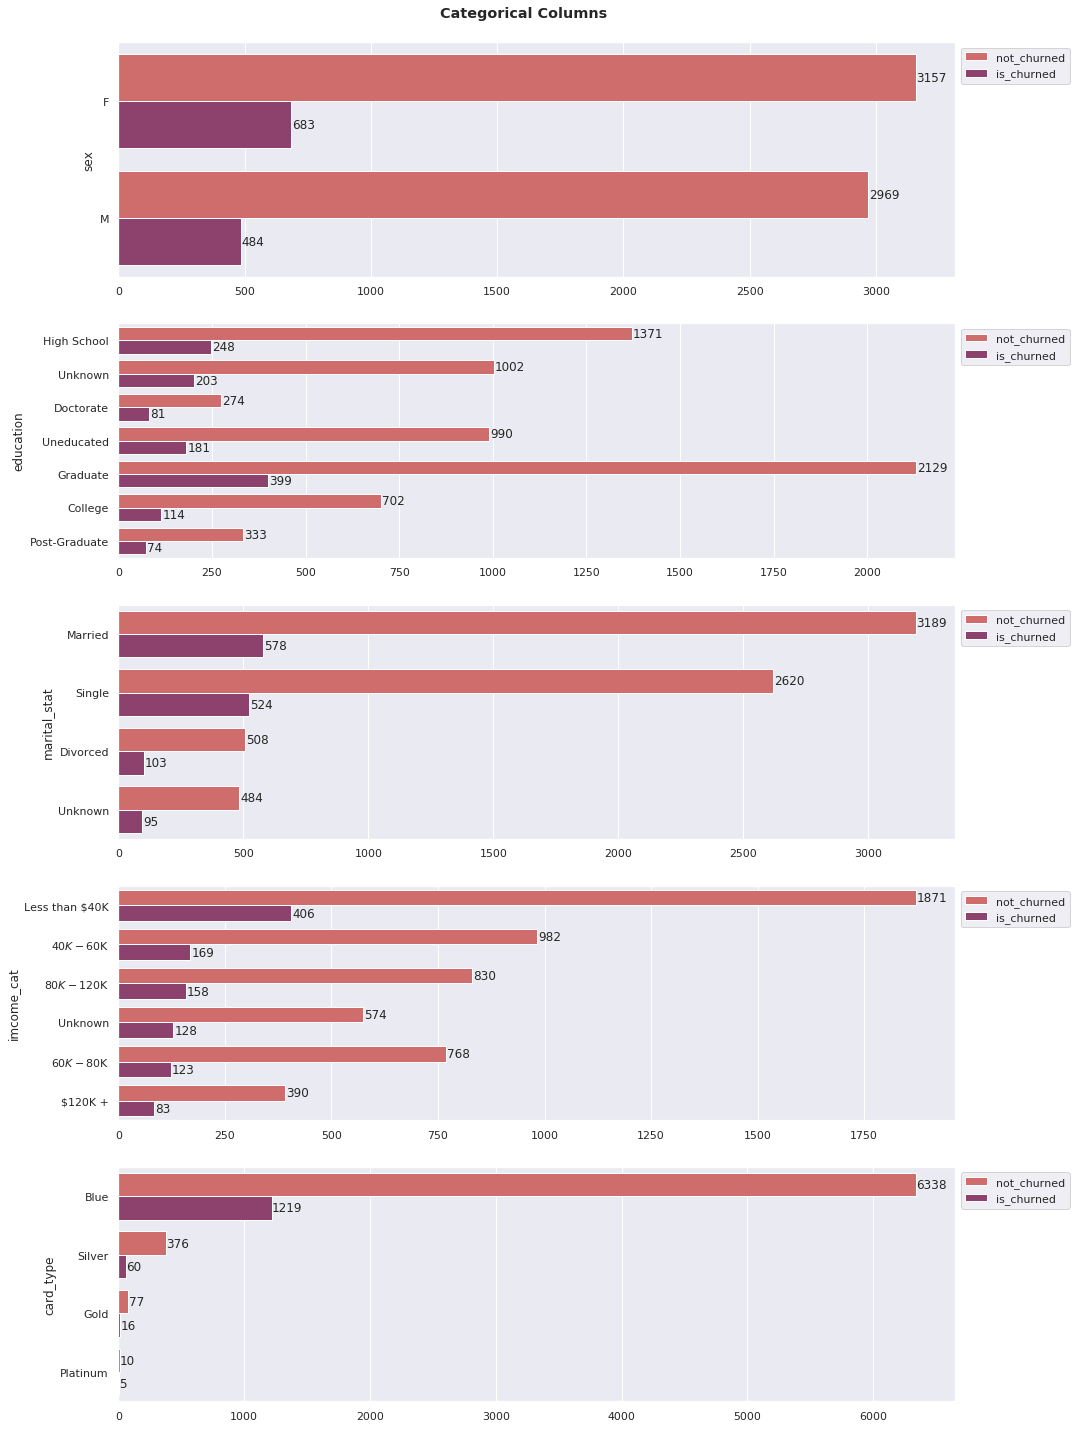

In [10]:
# 카테고리형 컬럼 별 데이터 건수 확인

sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(5, 1, figsize=(15, 25))

i=0

# 제목
fig.suptitle("Categorical Columns", y=0.9, fontweight="bold")

for col in col_cat:
    b = sns.countplot(data=df, y=col, ax=axs[i], hue="is_churned", palette="flare")
    b.set_xlabel(" ")
    b.legend(labels=["not_churned","is_churned"], loc=2, bbox_to_anchor=(1,1))
    
    # 각 막대별 크기 설정
    for p in b.patches:
        height = p.get_height() 
        width = p.get_width()
        axs[i].text(x = width + 3,
                y = p.get_y() + (height / 2),
                s = "{:.0f}".format(width),
                va = "center")
    i += 1

### 숫자형 컬럼 시각화

/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

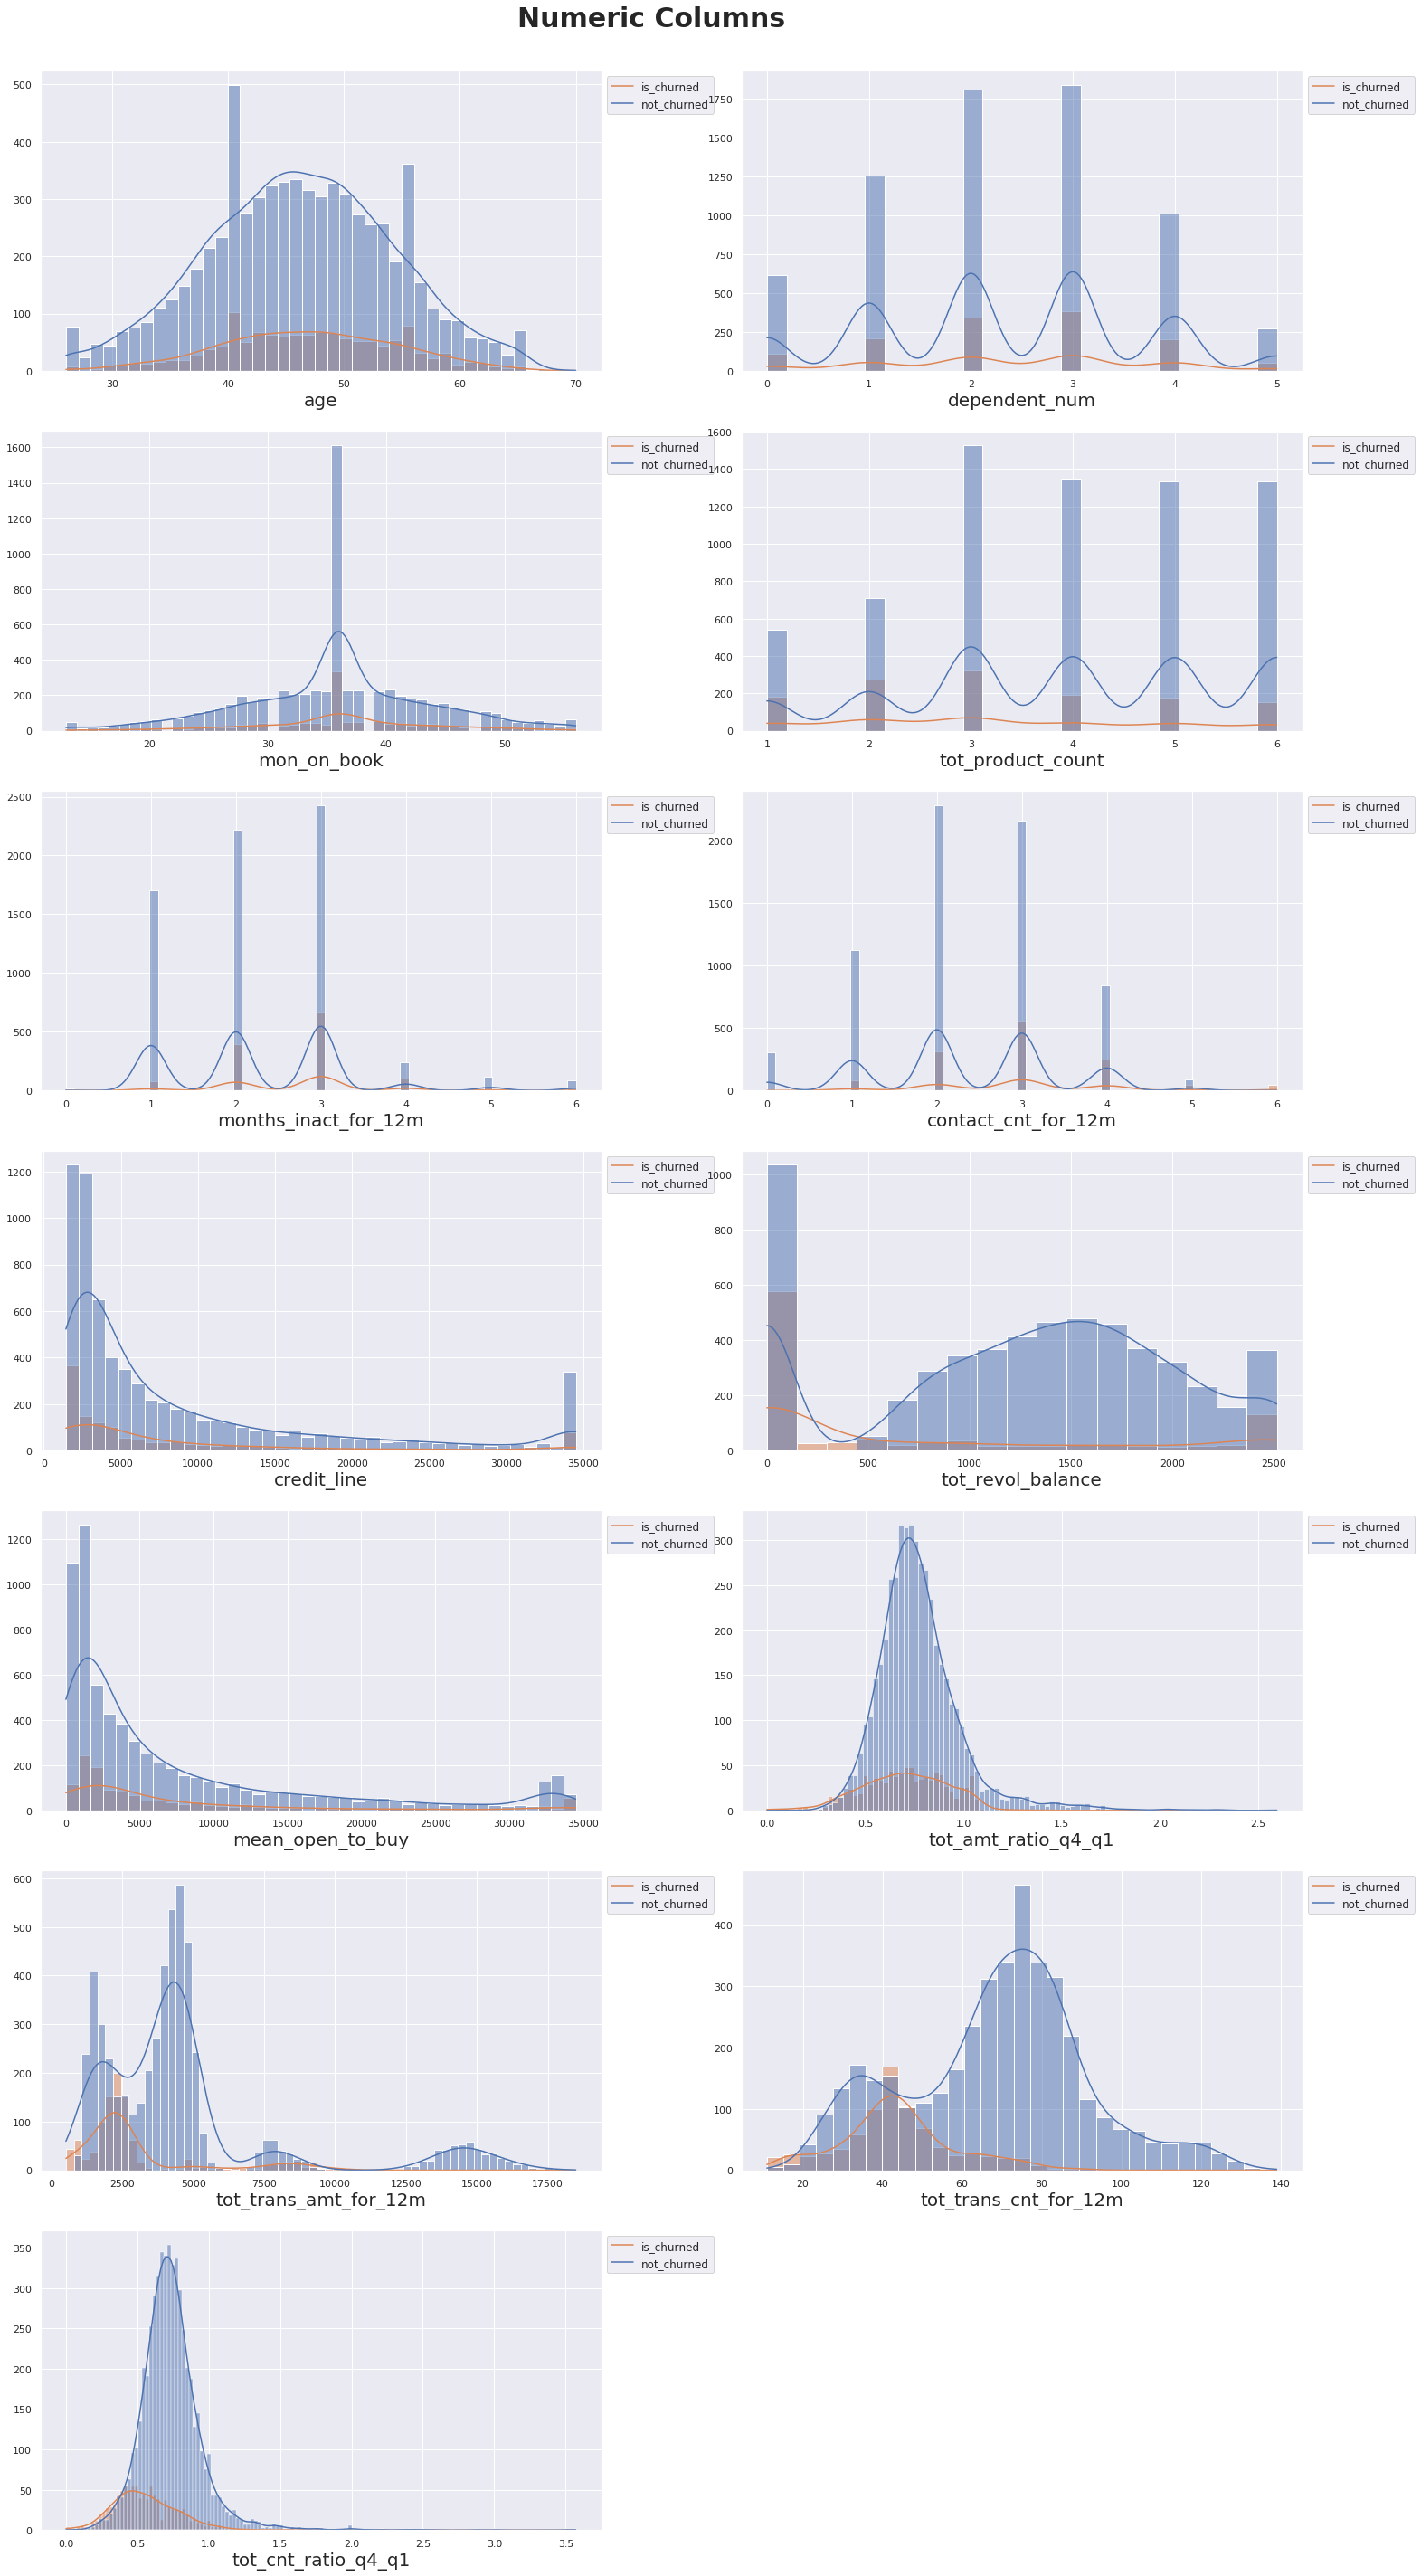

In [11]:
# 숫자형 컬럼 찾기
col_num = df.select_dtypes(include=["int64","float64"]).columns.tolist()

# is_churned는 제외
col_num.remove("is_churned")

fig, axs = plt.subplots(7, 2, figsize=(25, 50))

fig.suptitle("Numeric Columns", y=0.9, fontweight="bold", fontsize=30)


for col, ax in zip(col_num[1:], axs.flatten()):
    b = sns.histplot(x=col, ax=ax, color="lightcoral", data=df, hue="is_churned", kde=True)
    b.legend(labels=["is_churned","not_churned"], loc = 2, bbox_to_anchor = (1,1), fontsize=12)
    b.set_ylabel("")
    b.set_xlabel(col, fontsize=20)

    plt.subplots_adjust(wspace=.25)

plt.delaxes(axs[6,1])

# 데이터 전처리

### 이상치 제거

##### 이상치 확인

모델 성능 향상을 위해 데이터 내 이상치를 제거합니다.

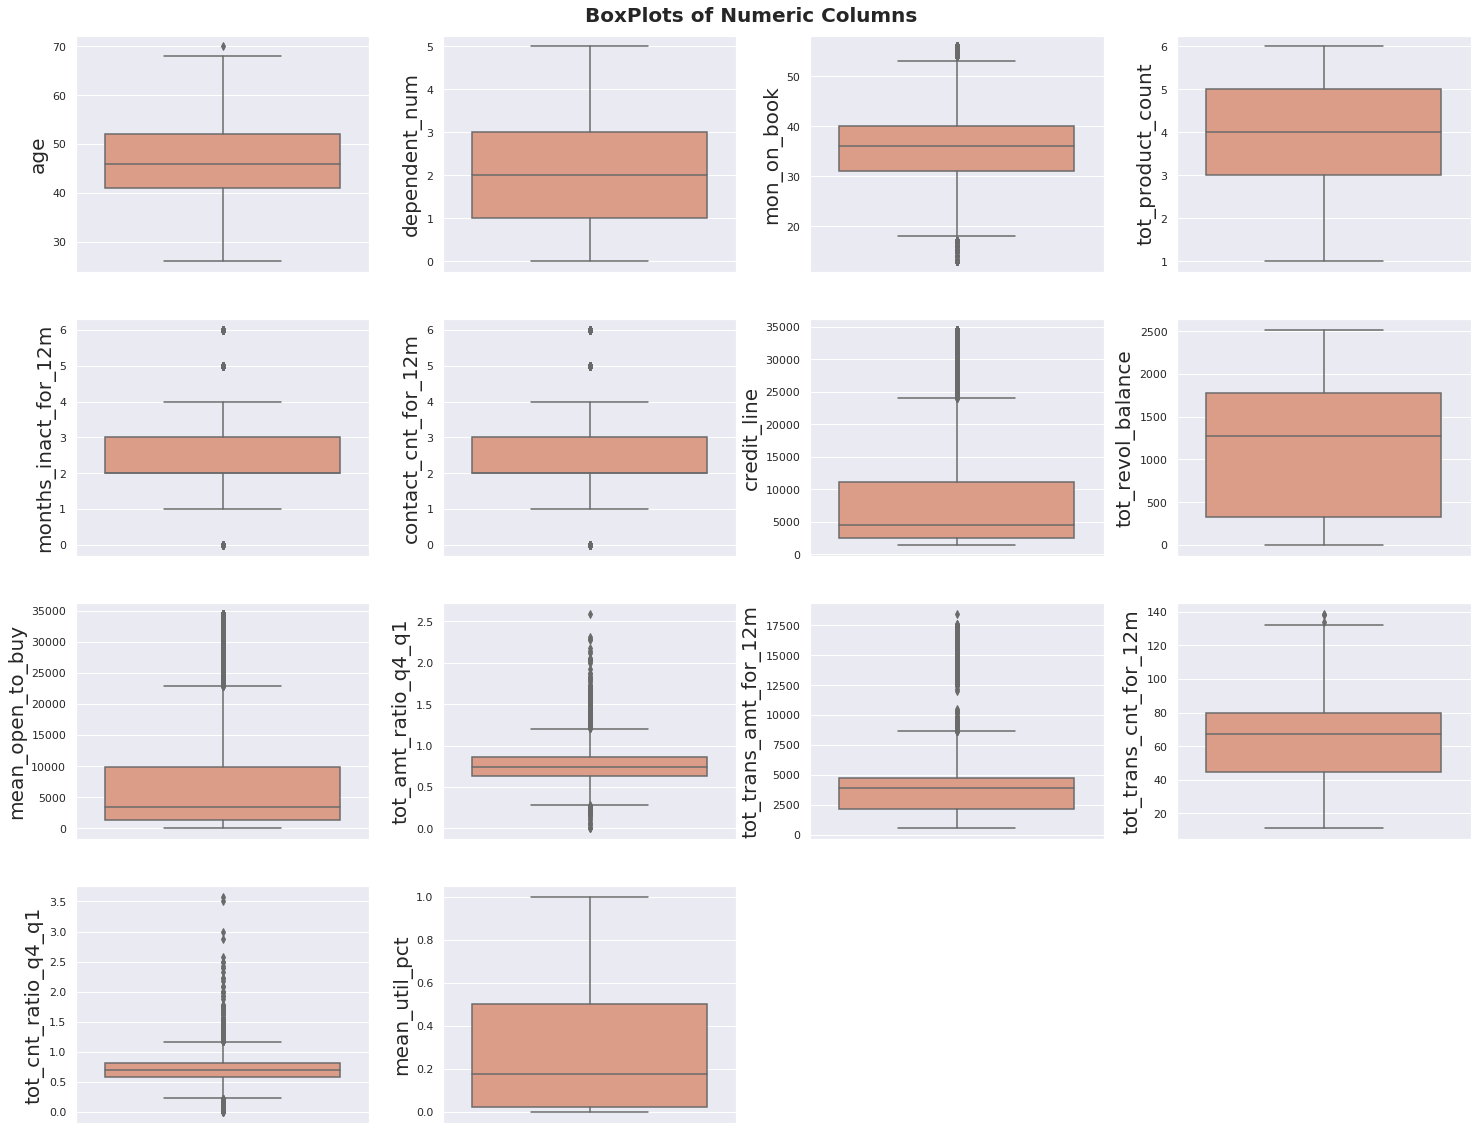

In [12]:
fig, axs = plt.subplots(4,4,figsize=(25,20))

# 제목
fig.suptitle("BoxPlots of Numeric Columns", y=0.9, fontweight="bold", fontsize=20)

# 그래프 그리기
for col, ax in zip(col_num[1:], axs.flatten()):
    b = sns.boxplot(y=df[col], ax=ax, color="darksalmon")
    b.set_ylabel(col, fontsize=20)
    plt.subplots_adjust(wspace=.25)

# 빈 셀은 제거
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])

In [13]:
# 이상치 제거 함수 선언
def outlier_trt(data,col):
    X = data[col].copy()

    # 1사분위수, 3사분위수, IQR 계산
    q3 = X.quantile(0.75)
    q1 = X.quantile(0.25)
    iqr = q3 - q1

    # 이상치를 IQR의 1.5배를 기준으로 판단하여 처리
    for idx, entry in enumerate(data[col]):
        if (entry > q3 + 1.5 * iqr):
            data.loc[idx, col] = q3 + 1.5 * iqr
        elif (entry < q1 - 1.5 * iqr):
            data.loc[idx, col] = q1 - 1.5 * iqr
    return X[(X > q3 + 1.5 * iqr)|(X < q1 - 1.5 * iqr)]


# 이상치 제거
col_outliers=df[col_num].iloc[:, [1, 3, 5, 6, 7, 9, 10, 11, 12, 13]].columns.tolist()

for col in col_outliers:
    outlier_trt(df,col)

##### 이상치 제거 후 확인

이상치를 제거한 후 데이터 분포를 다시 확인합니다.

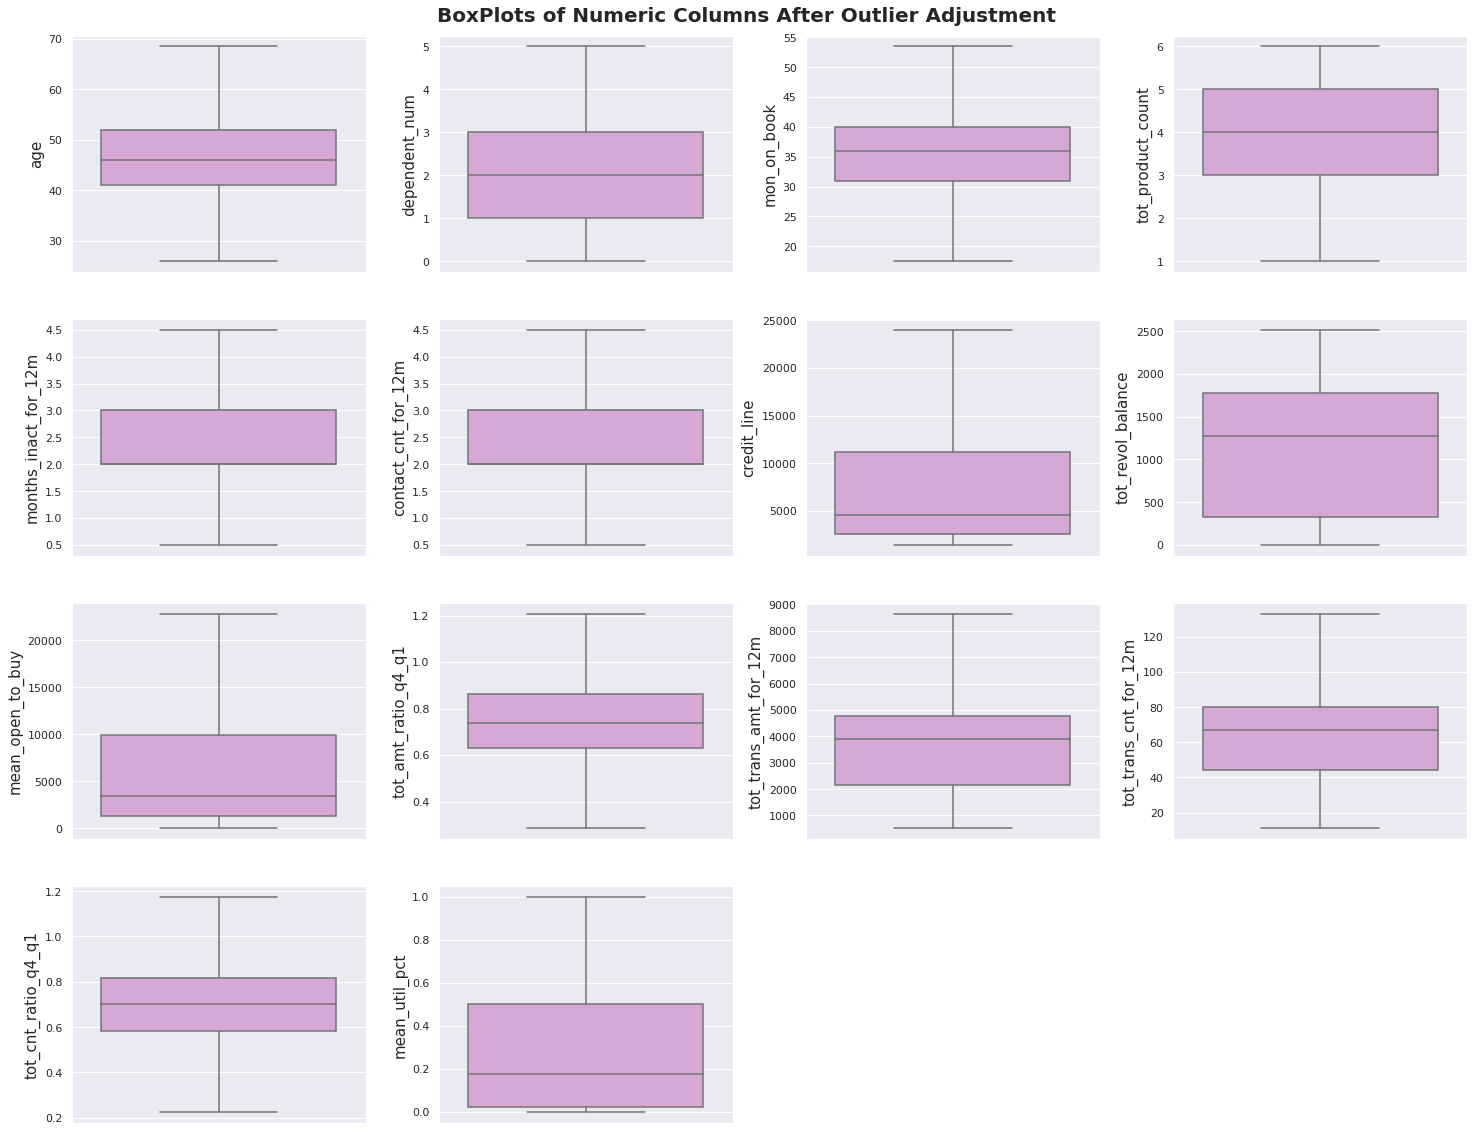

In [14]:
# 이상치 제거 후

fig, axs = plt.subplots(4, 4, figsize=(25,20))

fig.suptitle("BoxPlots of Numeric Columns After Outlier Adjustment", y=0.9, fontweight="bold", fontsize=20)

for col, ax in zip(col_num[1:], axs.flatten()):
    b = sns.boxplot(y=df[col], ax=ax, color="plum")
    b.set_ylabel(col, fontsize=15)
    plt.subplots_adjust(wspace=.25)
    
# 빈 셀은 제거
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])

### 결측치 제거

##### 결측치 합계 확인

In [15]:
df.isnull().sum()

cstno                       0
is_churned                  0
age                         0
sex                       808
dependent_num               0
education                   0
marital_stat                0
imcome_cat               1619
card_type                   0
mon_on_book                 0
tot_product_count           0
months_inact_for_12m        0
contact_cnt_for_12m         0
credit_line                 0
tot_revol_balance        1521
mean_open_to_buy            0
tot_amt_ratio_q4_q1      2435
tot_trans_amt_for_12m    1669
tot_trans_cnt_for_12m    3250
tot_cnt_ratio_q4_q1      1629
mean_util_pct            2526
dtype: int64

##### 결측치 비율 확인

In [16]:
df.isnull().sum()/df.shape[0]

cstno                    0.000000
is_churned               0.000000
age                      0.000000
sex                      0.099741
dependent_num            0.000000
education                0.000000
marital_stat             0.000000
imcome_cat               0.199852
card_type                0.000000
mon_on_book              0.000000
tot_product_count        0.000000
months_inact_for_12m     0.000000
contact_cnt_for_12m      0.000000
credit_line              0.000000
tot_revol_balance        0.187755
mean_open_to_buy         0.000000
tot_amt_ratio_q4_q1      0.300580
tot_trans_amt_for_12m    0.206024
tot_trans_cnt_for_12m    0.401185
tot_cnt_ratio_q4_q1      0.201086
mean_util_pct            0.311813
dtype: float64

### 데이터 변환 (결측치 제거)

##### 카테고리형 컬럼 값 종류 확인

In [17]:
category_columns = df.columns[df.dtypes == 'object']
category_columns

Index(['sex', 'education', 'marital_stat', 'imcome_cat', 'card_type'], dtype='object')

In [18]:
print('sex :', df['sex'].unique())
print('education :', df['education'].unique())
print('marital_stat :', df['marital_stat'].unique())
print('imcome_cat :', df['imcome_cat'].unique())
print('card_type :', df['card_type'].unique())

sex : ['F' 'M' nan]
education : ['High School' 'Unknown' 'Doctorate' 'Uneducated' 'Graduate' 'College'
 'Post-Graduate']
marital_stat : ['Married' 'Single' 'Divorced' 'Unknown']
imcome_cat : ['Less than $40K' '$40K - $60K' '$80K - $120K' 'Unknown' '$60K - $80K' nan
 '$120K +']
card_type : ['Blue' 'Silver' 'Gold' 'Platinum']


##### 데이터 변환

In [19]:
# 카테고리형 데이터를 수치형으로 변환

le = LabelEncoder()

df_temp = df.astype("object").apply(LabelEncoder().fit_transform)
df = df_temp.where(~df.isna(), df)

df

,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,0,0,19,0,3,3,1,4,0,19,...,3,3,1574,NaN,1430,486,NaN,100,349,460
1,1,1,32,1,0,6,2,1,0,28,...,1,3,1494,1784,711,646,90,10,84,NaN
2,2,1,20,1,3,1,0,3,0,21,...,3,3,3218,1196,3241,NaN,371,12,0,208
3,3,0,8,0,2,5,2,4,0,7,...,2,2,0,0,1114,482,1955,71,527,0
4,4,0,23,0,2,5,1,5,0,24,...,5,2,1302,232,1707,253,NaN,NaN,NaN,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,8096,0,15,0,3,0,1,NaN,0,20,...,1,2,0,248,457,NaN,NaN,NaN,NaN,521
8097,8097,0,24,1,0,5,1,2,0,29,...,1,3,1629,165,2003,NaN,NaN,NaN,440,175
8098,8098,1,23,0,3,3,1,4,0,28,...,2,3,1174,1739,287,NaN,NaN,NaN,203,NaN
8099,8099,0,28,1,4,2,1,0,0,33,...,2,0,1110,1435,644,268,632,NaN,356,698


##### KNN Imputer로 결측치 제거

In [20]:
imputer = KNNImputer(n_neighbors=5)
imputed_df = imputer.fit_transform(df)

df = pd.DataFrame(imputed_df, columns=df.columns)

In [21]:
df.isnull().sum()

cstno                    0
is_churned               0
age                      0
sex                      0
dependent_num            0
education                0
marital_stat             0
imcome_cat               0
card_type                0
mon_on_book              0
tot_product_count        0
months_inact_for_12m     0
contact_cnt_for_12m      0
credit_line              0
tot_revol_balance        0
mean_open_to_buy         0
tot_amt_ratio_q4_q1      0
tot_trans_amt_for_12m    0
tot_trans_cnt_for_12m    0
tot_cnt_ratio_q4_q1      0
mean_util_pct            0
dtype: int64

##### 결측치 제거 후 확인

In [22]:
df

,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,0.0,0.0,19.0,0.0,3.0,3.0,1.0,4.0,0.0,19.0,...,3.0,3.0,1574.0,931.4,1430.0,486.0,1684.2,100.0,349.0,460.0
1,1.0,1.0,32.0,1.0,0.0,6.0,2.0,1.0,0.0,28.0,...,1.0,3.0,1494.0,1784.0,711.0,646.0,90.0,10.0,84.0,715.8
2,2.0,1.0,20.0,1.0,3.0,1.0,0.0,3.0,0.0,21.0,...,3.0,3.0,3218.0,1196.0,3241.0,501.4,371.0,12.0,0.0,208.0
3,3.0,0.0,8.0,0.0,2.0,5.0,2.0,4.0,0.0,7.0,...,2.0,2.0,0.0,0.0,1114.0,482.0,1955.0,71.0,527.0,0.0
4,4.0,0.0,23.0,0.0,2.0,5.0,1.0,5.0,0.0,24.0,...,5.0,2.0,1302.0,232.0,1707.0,253.0,1720.6,56.0,375.4,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,8096.0,0.0,15.0,0.0,3.0,0.0,1.0,3.0,0.0,20.0,...,1.0,2.0,0.0,248.0,457.0,395.6,2709.2,63.0,382.4,521.0
8097,8097.0,0.0,24.0,1.0,0.0,5.0,1.0,2.0,0.0,29.0,...,1.0,3.0,1629.0,165.0,2003.0,400.6,2991.4,90.4,440.0,175.0
8098,8098.0,1.0,23.0,0.0,3.0,3.0,1.0,4.0,0.0,28.0,...,2.0,3.0,1174.0,1739.0,287.0,483.8,2192.6,66.2,203.0,768.6
8099,8099.0,0.0,28.0,1.0,4.0,2.0,1.0,0.0,0.0,33.0,...,2.0,0.0,1110.0,1435.0,644.0,268.0,632.0,53.0,356.0,698.0


# 모델 학습 및 성능평가

### 모델 생성 및 학습

##### Train 및 Valid Set 분할

In [23]:
# 데이터 셋 분할
x = df.drop('is_churned', axis=1)
y = df['is_churned']

# train / test 데이터 분할 (8:2)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

##### GridSearchCV를 이용한 최적 파라미터 탐색 수행

In [24]:
%%time

# 랜덤포레스트 / LightGBM / XGBoost 모델 선언
rf = RandomForestClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier()

# GridSearchCV를 위한 파라미터 선언

# Random Forest
param_rf = {
    "n_estimators" : [100, 300, 500, 1000],
    "max_depth" : [10, 30, 50]
}

# XGB
param_xgb = {
    "n_estimators" : [100, 300, 500, 1000],
    "max_depth" : [10, 30, 50],
    "learning_rate" : [0.01, 0.1, 0.2, 0.3]
}

# LightGBM
param_lgb = {
    "n_estimators" : [100, 300, 500, 1000],
    "learning_rate" : [0.01, 0.1, 0.2, 0.3]
}

n_jobs = 4

# GridSearchCV를 위한 모델 선언
gscv_rf  = GridSearchCV (estimator = rf, param_grid = param_rf, scoring ='roc_auc', cv = 3, refit=True, n_jobs=n_jobs)
gscv_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, scoring ='roc_auc', cv = 3, refit=True, n_jobs=n_jobs)
gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='roc_auc', cv = 3, refit=True, n_jobs=n_jobs)


# 학습 수행
gscv_rf.fit(train_x, train_y)
print('Random Forest Done')

gscv_xgb.fit(train_x, train_y)
print('XGBoost Done')

gscv_lgb.fit(train_x, train_y)
print('LightGBM Done')

print('<======== Train Finished ======>')

exception calling callback for <Future at 0x7fdea60e2550 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/conda/envs/python3.6/lib/python3.6/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/envs/python3.6/lib/python3.6/site-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/opt/conda/envs/python3.6/lib/python3.6/site-packages/joblib/parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/conda/envs/python3.6/lib/python3.6/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/envs/python3.6/lib/python3.6/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/envs/python3.6/lib/python3.6/site-packages/joblib/_parallel_backends.py", line 531, in

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

##### GridSearch로 도출된 모델 중 최고 성능값 출력

In [25]:
# 최적 파라미터 및 정확도 확인
print('============================================')
print('Random Forest Best Params : ', gscv_rf.best_params_)
print('Random Forest Best Score : ', gscv_rf.best_score_)
print('============================================')
print('XGBoost Best Params : ', gscv_xgb.best_params_)
print('XGBoost Best Score : ', gscv_xgb.best_score_)
print('============================================')
print('LightGBM Best Params : ', gscv_lgb.best_params_)
print('LightGBM Best Score : ', gscv_lgb.best_score_)
print('============================================')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### 모델 성능 시각화 (ROC Curve)

In [ ]:
# 모델별 ROC Curve 그리기
plt.figure(figsize=(10, 10))

fpr, tpr, thresholds = roc_curve(test_y, gscv_rf.predict_proba(test_x)[:, 1])
plt.plot(fpr, tpr, label='RandomForestClassifier')

fpr, tpr, thresholds = roc_curve(test_y, gscv_xgb.predict_proba(test_x)[:, 1])
plt.plot(fpr, tpr, label='XGBClassifier')

fpr, tpr, thresholds = roc_curve(test_y, gscv_lgb.predict_proba(test_x)[:, 1])
plt.plot(fpr, tpr, label='LGBMClassifier')

# 각 모델별 AUC Score 출력 (소숫점 3자리까지)
print('RandomForestClassifier AUC Score :', round(roc_auc_score(test_y, gscv_rf.predict_proba(test_x)[:, 1]), 3))
print('XGBoostClassifier AUC Score :', round(roc_auc_score(test_y, gscv_xgb.predict_proba(test_x)[:, 1]), 3))
print('LGBMClassifier AUC Score :', round(roc_auc_score(test_y, gscv_lgb.predict_proba(test_x)[:, 1]), 3))

# 각 모델별 ROC Curve 출력
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Overfitting 확인

##### LightGBM 모델 Overfitting 확인

In [ ]:
# OverFitting 확인

n_jobs = 4

train_sizes, train_scores, test_scores = learning_curve(estimator=gscv_lgb, X=x, y=y, cv=3, n_jobs=n_jobs)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curves')
plt.grid()
plt.show()

### Feature 추출

In [ ]:
feature_importances = gscv_lgb.best_estimator_.feature_importances_

feature_names = list(x.columns)
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Feature 중요도를 높은 순으로 정렬
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Feature 중요도 출력
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Feature 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), [importance for _, importance in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [feature for feature, _ in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 결과 해석

```
학습된 최종 모델을 기반으로 특성값을 보았을 때, 영향도 순으로 본 최상위 3개의 특성은 다음과 같았습니다.

1. tot_trans_amt_for_12m (12개월 동안의 거래금액) 
2. tot_cnt_ratio_q4_q1 (1분기 대비 4분기의 거래 횟수 비율)
3. tot_amt_ratio_q4_q1 (1분기 대비 4분기의 거래 금액 비율)

영향도가 낮은 순으로 본 최하위 3개의 특성은 다음과 같았습니다.

1. card_type (카드 종류)
2. material_stat (결혼상태)
3. sex (성별)

따라서 해당 특성을 가진 고객들에게 일정 금액 이상 거래 시 수수료면제를 제공하거나 특정 횟수 이상 거래 시 우대금리를 제공하는 등의 특정 고객층을 타겟팅하여 마케팅 및 상품기획을 한다면, 고객 이탈을 줄일 수 있을 것으로 생각됩니다.
```

# 데이터 변환
> 다음 내용이 유일

In [ ]:
df_temp = df.astype("object").apply(LabelEncoder().fit_transform)